# Udacity-DAND/P2 - Investigate a Dataset

## Titanic Sotry Summary

After reading about the story of the Titanic ship 


Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. 

Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history [[1]](https://en.wikipedia.org/wiki/RMS_Titanic)

## Titanic Dataset Overview 

The documentation of the dataset on the data provider's website: Kaggle, offers the following information [[2]](https://www.kaggle.com/c/titanic/data): 

Variable | Definition | Key
-------- | ---------- | ---
survival | Survival | 0 = No, 1 = Yes
pclass | Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex |
age | Age in years |
sibsp | # of siblings / spouses aboard the Titanic |
parch | # of parents / children aboard the Titanic |
ticket | Ticket number |
fare | Passenger fare |
cabin | Cabin number |
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

In this exercise, we will be working on the subset of the data that was provided by Udacity, which still has all the above variables, but for model training purposes (i.e. the survival data is provided).

----------------------

## Analysis Qustions

In light of the above information, the first question that comes to mind is: <br />
   **What are the factors that characterized survivors?** 

But we can break this down to three main parts: <br />
   **1. What are the social factors that affected the passengers' survival chances** <br />
>This might include: 
               - Age
               - Sex
               - Number of Siblings/Spouses
               - Number of Parents/Children
               - Any other data point we can derive from the above
           
   **2. What are the economical factors that affected the passengers' survival chances** <br />
>This might include: 
               - Ticket Class
               - Fare
               - Cabin 
               - Port of Embarkation 

   **3. What combinations of social and economical factors can tell us more about survival chances?** <br />
>It would be interesting to see how multiple combined socio-economic factors affected the chances of survival. 


---------------------------

## Data Wrangling   

To learng more about the dataset and start cleaning it, the following code will import the needed python libraries and will read the provided file ('titanic-data.csv') and store it in a Pandas dataframe, then show the first and last 10 rows. We will also look at the data types of the provided coumns.   

----------


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sp
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head(10) # The first 10 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic_df.tail(10) # The last 10 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [3]:
titanic_df.dtypes # exploring the data types of provided data points

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

-----------------------
**We can also investigate the following:**
- Unique values of some columns to learn more about the data (what and how many categories are there)
- Missing values in each column to make a decision whether to use or drop some rows/columns, or maybe find a way to replace missing values. 

-----------------------

In [4]:
print "Unique values of Survived column", titanic_df['Survived'].unique()
print "Unique values of Pclass column", titanic_df['Pclass'].unique()
print "Unique values of Sex column", titanic_df['Sex'].unique()
print "Unique values of Embarked column", titanic_df['Embarked'].unique()
print "Unique values of Cabin column", titanic_df['Cabin'].unique()


Unique values of Survived column [0 1]
Unique values of Pclass column [3 1 2]
Unique values of Sex column ['male' 'female']
Unique values of Embarked column ['S' 'C' 'Q' nan]
Unique values of Cabin column [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C9

In [5]:
def number_of_nans(column_name):
    return "Number of NaNs in {}:".format(column_name), titanic_df[column_name].isnull().sum(), \
            "Out of: ", len(titanic_df[column_name])
    
for i in titanic_df.columns:
    print number_of_nans(i)
    


('Number of NaNs in PassengerId:', 0, 'Out of: ', 891)
('Number of NaNs in Survived:', 0, 'Out of: ', 891)
('Number of NaNs in Pclass:', 0, 'Out of: ', 891)
('Number of NaNs in Name:', 0, 'Out of: ', 891)
('Number of NaNs in Sex:', 0, 'Out of: ', 891)
('Number of NaNs in Age:', 177, 'Out of: ', 891)
('Number of NaNs in SibSp:', 0, 'Out of: ', 891)
('Number of NaNs in Parch:', 0, 'Out of: ', 891)
('Number of NaNs in Ticket:', 0, 'Out of: ', 891)
('Number of NaNs in Fare:', 0, 'Out of: ', 891)
('Number of NaNs in Cabin:', 687, 'Out of: ', 891)
('Number of NaNs in Embarked:', 2, 'Out of: ', 891)


-----------------------------


From the above quick investigation of the data, we can notice some issues with the quality of the data. Following is a summary of what we will do in the next code block to clean the data, and derive new features: 

-----------------------------
#### 1. Dropping Datapoints:
For the purpose of our analysis, the following column can be dropped: 
- Fare: The fare is basically represented by the Passenger Class
- Cabin: Although the cabin in which the passenger stayed might greatly contribute in survival chances, but unfortunately most of the data is missing. 
- Embarked: This would help in adding a geographical dimension to our analysis, but it's not our focus in this project.  
- Ticket: This would help in our analysis either. 

-----------------------------
#### 2. Changing Data Types:
From the above code, we notice that the data types of the remaining columns don't need to be changed for the purpose of our analysis except for one, PassengerId, which we will change to string because we will not need to perform any mathematical operations on it: 
>
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64

The code below will drop unneeded columns and change the data type of PassengerId to string. 

-----------------------------


In [6]:
titanic_df.drop(['Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0


In [7]:
titanic_df['PassengerId'] = titanic_df['PassengerId'].astype(str)
titanic_df.dtypes

PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
dtype: object

-----------------------------

#### 3. Manipulating Datapoints:

Now, we have only one column with missing values, but the problem is that we are missing around 20% of the data in that column! To overcome this issue, we can consider any of the following options: 
- Drop the rows with the missing age values
- Replace the missing age values with the average of available age values
- **Extract more data points from columns (such as the personal title (Miss, Mrs, Mr, and Master), group passengers based on title, taking into consideration number of Siblings/Spouses and Parents/Children, and then replace the missing 'Age' values by the groups' average.** [[3]](https://www.youtube.com/watch?v=u6sahb7Hmog)
- Create a model to pridect missing age values (out of the scope of this project)

We are going with the third option, as it provides a better proxy of the missing data than an overall average, and option 4 is out of scope for this project. <br\>

To do that, first we need to split the Name to Title, First Name and Last Name, then we need to explore the unique values of Titles and their Age averages, and lastly, replace NAs in the Age column with these averages. 

After that, if we still have a few Null vaues, we will drop them. 

-----------------------------

In [8]:
split_last_name = titanic_df['Name'].str.split(',', expand=True)
titanic_df['LastName']=split_last_name[0]

split_title = split_last_name[1].str.split('.', expand=True)
titanic_df['FirstName']=split_title[1]
titanic_df['Title']=split_title[0]

titanic_df.drop(['Name'], axis=1, inplace=True)

In [9]:
# Showing 20 first rows to test our code for some special casees in the following cells
# Notice PassengerID: 20, a female with 0 for Parch and SibSp and Mrs as a Title
titanic_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,LastName,FirstName,Title
0,1,0,3,male,22.0,1,0,Braund,Owen Harris,Mr
1,2,1,1,female,38.0,1,0,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,female,26.0,0,0,Heikkinen,Laina,Miss
3,4,1,1,female,35.0,1,0,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3,male,35.0,0,0,Allen,William Henry,Mr
5,6,0,3,male,NaN,0,0,Moran,James,Mr
6,7,0,1,male,54.0,0,0,McCarthy,Timothy J,Mr
7,8,0,3,male,2.0,3,1,Palsson,Gosta Leonard,Master
8,9,1,3,female,27.0,0,2,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Mrs
9,10,1,2,female,14.0,1,0,Nasser,Nicholas (Adele Achem),Mrs


In [10]:
print "Unique values of Titles: ", titanic_df['Title'].unique()


Unique values of Titles:  [' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


In [11]:
# To show a table of all titles and their counts

sub_titanic_df = titanic_df[['PassengerId', 'Title']]
sub_titanic_df.groupby(['Title']).agg('count')

,PassengerId
Title,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


In [12]:
# Sub-grouping passengers based on Title, numer of parents/Children, and number of Siblings
# Then finding the Mean Age for each sub-group

sub_titanic_df = titanic_df[['PassengerId', 'Age', 'SibSp', 'Parch', 'Title']]

sub_titanic_df.groupby(['Title', 'Parch', 'SibSp']).agg(['mean', 'max', 'min', 'count'])


Age                   
                                mean   max    min count
Title         Parch SibSp                              
 Capt         1     1      70.000000  70.0  70.00     1
 Col          0     0      58.000000  60.0  56.00     2
 Don          0     0      40.000000  40.0  40.00     1
 Dr           0     0      39.500000  54.0  23.00     4
                    2      47.000000  50.0  44.00     2
 Jonkheer     0     0      38.000000  38.0  38.00     1
 Lady         0     1      48.000000  48.0  48.00     1
 Major        0     0      48.500000  52.0  45.00     2
 Master       0     1      12.000000  12.0  12.00     1
              1     0       3.210000   6.0   0.42     2
                    1       3.722222   9.0   0.67     9
                    2       1.000000   1.0   1.00     1
                    3       2.000000   2.0   2.00     1
                    4       4.428571   8.0   1.00     7
              2     0       3.707500   9.0   0.83     4
                    1       4.306667  11.0   0.92     3
                    3       7.000000  10.0   4.00     2
                    4       5.333333   9.0   3.00     3
                    5       7.000000  11.0   1.00     3
                    8            NaN   NaN    NaN     0
 Miss         0     0      27.743590  58.0   5.00    78
                    1      28.708333  63.0  14.00    12
                    2      18.000000  18.0  18.00     1
              1     0      12.000000  22.0   2.00    11
                    1      12.000000  39.0   1.00     7
                    2       2.625000   5.0   0.75     4
                    3       5.500000   8.0   3.00     2
              2     0      15.818182  36.0   1.00    11
                    1       9.600000  24.0   2.00     5
                    2      17.250000  21.0   9.00     4
...                              ...   ...    ...   ...
 Mr           2     1      30.750000  36.0  25.00     4
                    3      19.000000  19.0  19.00     1
                    5      14.000000  14.0  14.00     1
                    8            NaN   NaN    NaN     0
              3     1      16.000000  16.0  16.00     1
              4     1      52.000000  64.0  40.00     2
              5     1      39.000000  39.0  39.00     1
 Mrs          0     0      41.812500  63.0  23.00    16
                    1      32.388889  60.0  14.00    36
                    2      53.000000  53.0  53.00     1
                    3      31.500000  33.0  30.00     2
              1     0      40.916667  58.0  18.00    12
                    1      35.833333  52.0  22.00    18
                    2      24.000000  24.0  24.00     1
              2     0      29.666667  41.0  24.00     6
                    1      32.800000  48.0  22.00     5
              3     0      24.000000  24.0  24.00     1
                    1      51.000000  54.0  48.00     2
                    2      24.000000  24.0  24.00     1
              4     0      29.000000  29.0  29.00     1
                    1      45.000000  45.0  45.00     1
              5     0      40.000000  41.0  39.00     2
                    1      38.500000  39.0  38.00     2
              6     1      43.000000  43.0  43.00     1
 Ms           0     0      28.000000  28.0  28.00     1
 Rev          0     0      44.250000  57.0  27.00     4
                    1      54.000000  54.0  54.00     1
              1     0      28.000000  28.0  28.00     1
 Sir          0     1      49.000000  49.0  49.00     1
 the Countess 0     0      33.000000  33.0  33.00     1

[74 rows x 4 columns]

In [13]:
# Replacing NaNs with the Mean Age of the sub-group passengers belong to: 

grouped = sub_titanic_df.groupby(['Title', 'Parch', 'SibSp'])

replace_na_by_mean = lambda x: x.fillna(x.mean())

titanic_df['Age'] = np.round(grouped.transform(replace_na_by_mean)['Age'], 0)

titanic_df.head(20) # Notice PassengerID: 20, it changed from NaN to a 42, 
                    # which is the Avg. Age of femals with Tilte: Mrs and 0 SibSp 0 Parch (41.81).  

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,LastName,FirstName,Title
0,1,0,3,male,22.0,1,0,Braund,Owen Harris,Mr
1,2,1,1,female,38.0,1,0,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,female,26.0,0,0,Heikkinen,Laina,Miss
3,4,1,1,female,35.0,1,0,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3,male,35.0,0,0,Allen,William Henry,Mr
5,6,0,3,male,32.0,0,0,Moran,James,Mr
6,7,0,1,male,54.0,0,0,McCarthy,Timothy J,Mr
7,8,0,3,male,2.0,3,1,Palsson,Gosta Leonard,Master
8,9,1,3,female,27.0,0,2,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Mrs
9,10,1,2,female,14.0,1,0,Nasser,Nicholas (Adele Achem),Mrs


In [14]:
# To check if we still have NaN values!
print number_of_nans('Age')  


('Number of NaNs in Age:', 7, 'Out of: ', 891)


In [15]:
# Dropping the remaining few NaNs 
titanic_df = titanic_df.dropna()

# The new cleaned Dataset now has the following number of rows
titanic_df.count()

PassengerId    884
Survived       884
Pclass         884
Sex            884
Age            884
SibSp          884
Parch          884
LastName       884
FirstName      884
Title          884
dtype: int64

-----------------------------

Now, that we have a clean dataset, we can enhance it even better by creating a new column that categorizes the Age attribute in five categories. [[4]](http://pandas.pydata.org/pandas-docs/stable/categorical.html)

This will help us later on in exploring the dataset

-----------------------------

In [16]:
def what_age_group(age):
    if age <= 12:
        return 'Child'
    elif age >= 13 and age <=19:
        return 'Teenager'
    elif age >=20 and age <=39:
        return 'Adult'
    elif age >=40 and age <=59:
        return 'Middle Age'
    else: 
        return 'Senior'

titanic_df['AgeGroup'] = titanic_df['Age'].apply(what_age_group).astype("category")

# Ordering our categories to unify the oder in plots and pivot tables in the following cells
titanic_df['AgeGroup'].cat.set_categories(['Child','Teenager','Adult','Middle Age', 'Senior'],inplace=True)

titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,LastName,FirstName,Title,AgeGroup
0,1,0,3,male,22.0,1,0,Braund,Owen Harris,Mr,Adult
1,2,1,1,female,38.0,1,0,Cumings,John Bradley (Florence Briggs Thayer),Mrs,Adult
2,3,1,3,female,26.0,0,0,Heikkinen,Laina,Miss,Adult
3,4,1,1,female,35.0,1,0,Futrelle,Jacques Heath (Lily May Peel),Mrs,Adult
4,5,0,3,male,35.0,0,0,Allen,William Henry,Mr,Adult
5,6,0,3,male,32.0,0,0,Moran,James,Mr,Adult
6,7,0,1,male,54.0,0,0,McCarthy,Timothy J,Mr,Middle Age
7,8,0,3,male,2.0,3,1,Palsson,Gosta Leonard,Master,Child
8,9,1,3,female,27.0,0,2,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Mrs,Adult
9,10,1,2,female,14.0,1,0,Nasser,Nicholas (Adele Achem),Mrs,Teenager


-----------------------------

#### 4. Summarizing The New Cleaned Data:

After doing all this, now we can create a Pivot Table to summarize the new clean dataset: [[5]](http://pbpython.com/pandas-pivot-table-explained.html)

-----------------------------

In [17]:
# Summarizing the analysis in one Pivot Table and adding a percentage column to it

Summary = pd.pivot_table(titanic_df,index=['Pclass','Sex', 'AgeGroup'],values=['Survived'], \
                         aggfunc=[np.sum, len], margins=True)

Summary['percentage']= Summary['sum']/Summary['len']*100

Summary


sum      len  percentage
                         Survived Survived            
Pclass Sex    AgeGroup                                
1      female Child           0.0      1.0    0.000000
              Teenager       13.0     13.0  100.000000
              Adult          49.0     50.0   98.000000
              Middle Age     26.0     27.0   96.296296
              Senior          3.0      3.0  100.000000
       male   Child           3.0      3.0  100.000000
              Teenager        1.0      4.0   25.000000
              Adult          26.0     61.0   42.622951
              Middle Age     13.0     40.0   32.500000
              Senior          2.0     14.0   14.285714
2      female Child           8.0      8.0  100.000000
              Teenager        8.0      8.0  100.000000
              Adult          40.0     44.0   90.909091
              Middle Age     14.0     16.0   87.500000
              Senior          NaN      NaN         NaN
       male   Child           9.0      9.0  100.000000
              Teenager        1.0     10.0   10.000000
              Adult           5.0     68.0    7.352941
              Middle Age      1.0     17.0    5.882353
              Senior          1.0      4.0   25.000000
3      female Child          12.0     28.0   42.857143
              Teenager       14.0     24.0   58.333333
              Adult          43.0     76.0   56.578947
              Middle Age      2.0     12.0   16.666667
              Senior          1.0      1.0  100.000000
       male   Child          11.0     28.0   39.285714
              Teenager        3.0     38.0    7.894737
              Adult          31.0    242.0   12.809917
              Middle Age      2.0     31.0    6.451613
              Senior          0.0      4.0    0.000000
All                         342.0    884.0   38.687783


--------------------

## Data Exploration   

We are now ready to start exploring the data to find a story to tell. 

In the next six visualizations, we are going to plot:
- 'Survived' broken down by 
        'Sex' (male, female) 
            | Figures: (1-A) and (1-B)
- 'Survived' broken down by 
        'Pclass' (1, 2, 3) 
            | Figures: (2-A) and (2-B)
- 'Survived' broken down by 
        'AgeGroup' (Child, Teenager, Adult, Middle Age, Senior) 
            | Figures: (3-A) and (3-B)

For each of the above breakdowns, we are going to present two visualization:
- Bar Chart: To show the numbers of passengers in each group (Figure A)
- Mosaic Plot for: To give an idea of the percentages of passengers in each group (Figure B)


To create these charts, we used the groupby functions with unstack [[6]](http://pandas.pydata.org/pandas-docs/stable/groupby.html) - [[7]](http://stackoverflow.com/questions/30679467/pivot-tables-or-group-by-for-pandas)


--------------------


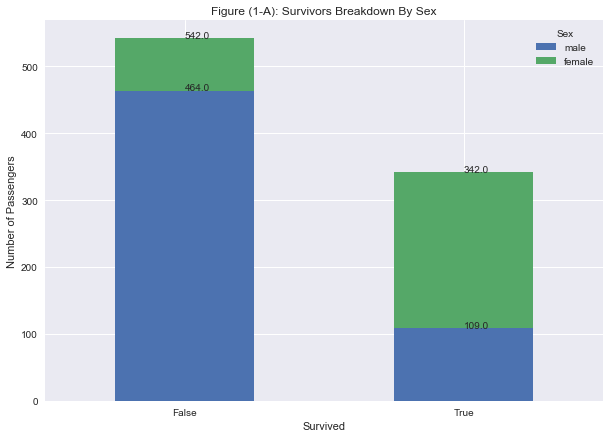

In [18]:
# Converting the attribute 'Survived' to a Boolean type
titanic_df['Survived'] = titanic_df['Survived'].astype(bool)

# Grouping the dataframe by 'Survived', 'Sex' and then unstacking 'Sex'
Survived_Sex = titanic_df.groupby(['Survived', 'Sex'])['Survived'].count().unstack('Sex')

# Plotting 'Survived' broken down by 'Sex'
ax = Survived_Sex[['male','female']].plot(kind='bar', stacked=True, \
                                          title="Figure (1-A): Survivors Breakdown By Sex", figsize=(10, 7), rot=0)
ax.set(ylabel="Number of Passengers")

# Showing values on top of the plot
total_0 = 0
total_1 = 0
for p in ax.patches:
    if p.get_x()+0.25 == 0:
        total_0 = total_0 + p.get_height()
        ax.annotate(str(total_0), (p.get_x()+0.25, total_0))
    else:
        total_1 = total_1 + p.get_height()
        ax.annotate(str(total_1), (p.get_x()+0.25, total_1))


In figure (1-A) above, we see that 542 pasengers perished, of which the majority (464) were males. In the other hand, 342 passengers survived of which the majority (233) were females. 

To get a better idea on the percentages of the survived passengers vs perished and the sex breakdown, let's look at the mosaic plot below. 

(<matplotlib.figure.Figure at 0x112bba750>,
 OrderedDict([(('Perished', 'female'), (0.0, 0.0, 0.610071812881295, 0.14343332802098788)), (('Perished', 'male'), (0.0, 0.1467555871572005, 0.610071812881295, 0.85324441284279962)), (('Survived', 'female'), (0.6150469372594044, 0.0, 0.38495306274059565, 0.67902313924345747)), (('Survived', 'male'), (0.6150469372594044, 0.68234539837967001, 0.38495306274059565, 0.31765460162032982))]))

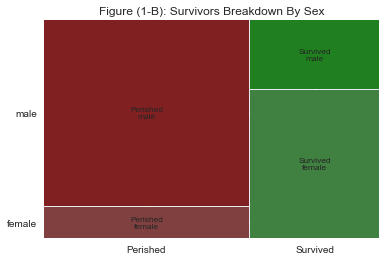

In [19]:
# Creating a new attribute "Status" to show the status of passengers on the Mosaic plot
titanic_df['Status']= titanic_df.Survived.map({False:'Perished', True:'Survived'})

# Mosaic plot to give an idea about the percentages of the above Bar Chart 
mosaic(titanic_df.sort_values(['Status', 'Sex']), ['Status', 'Sex'], \
       title="Figure (1-B): Survivors Breakdown By Sex")


In figure (1-B) above, we see that arounf 2 thirds of the passengers perishied, and almost 90% of perished ones were males, and aound 70% of the survived ones were females. 

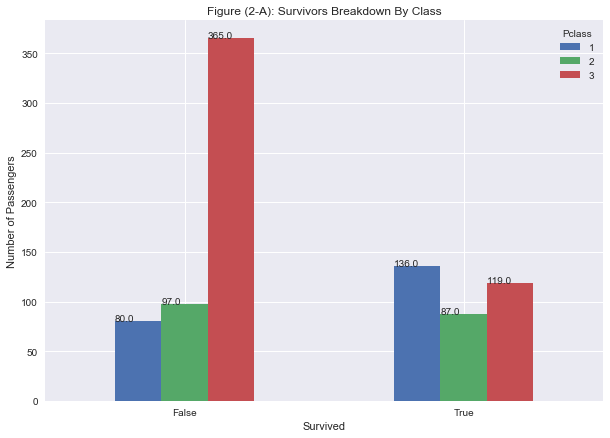

In [20]:
# Grouping the dataframe by 'Survived', 'Pclass' and then unstacking 'Pclass'
Survived_Class = titanic_df.groupby(['Survived', 'Pclass'])['Survived'].count().unstack('Pclass')

# Plotting 'Survived' broken down by 'Pclass'
ax = Survived_Class[[1, 2, 3]].plot(kind='bar', \
                                    title="Figure (2-A): Survivors Breakdown By Class", figsize=(10, 7), rot=0)
ax.set(ylabel="Number of Passengers")

# Showing values on top of the plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))


In figure (2-A) above, we're trying to investigate the distribution of survived/perished passengers according to their ticket class. We can clearly see that third class passengers were the majority of perished passengers followed by second then first. While more passengers survived from the first class followed by third, then second!   

To get a better idea on the percentages, let's look at the mosaic plot below. 

(<matplotlib.figure.Figure at 0x11629b590>,
 OrderedDict([(('Perished', '1'), (0.0, 0.0, 0.610071812881295, 0.14662398279611935)), (('Perished', '2'), (0.0, 0.14993524107426506, 0.610071812881295, 0.17778157914029474)), (('Perished', '3'), (0.0, 0.33102807849270549, 0.610071812881295, 0.66897192150729456)), (('Survived', '1'), (0.6150469372594044, 0.0, 0.38495306274059565, 0.39502730335773201)), (('Survived', '2'), (0.6150469372594044, 0.39833856163587772, 0.38495306274059565, 0.25270128964796096)), (('Survived', '3'), (0.6150469372594044, 0.65435110956198439, 0.38495306274059565, 0.3456488904380155))]))

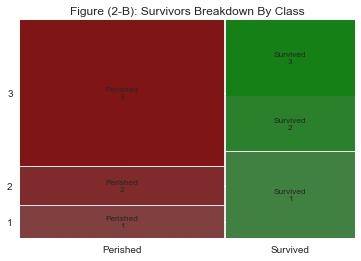

In [21]:
# Mosaic plot to give an idea about the percentages of the above Bar Chart 
mosaic(titanic_df.sort_values(['Status', 'Pclass']), ['Status', 'Pclass'], \
       title="Figure (2-B): Survivors Breakdown By Class")


Figure (2-B) shows that around 65% of perished passengers had third class tickets. 

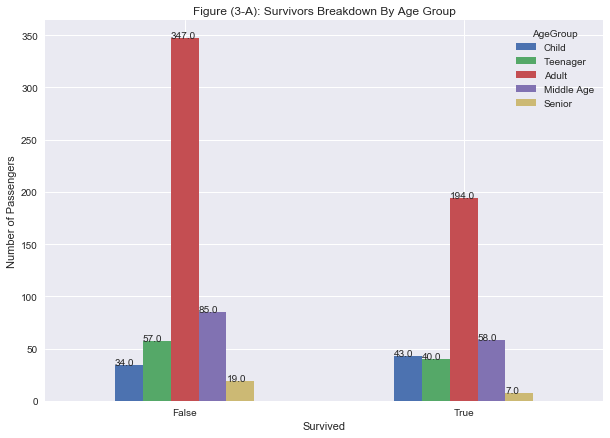

In [22]:
# Grouping the dataframe by 'Survived', 'AgeGroup' and then unstacking 'AgeGroup'
Survived_AgeGroup = titanic_df.groupby(['Survived', 'AgeGroup'])['Survived'].count().unstack('AgeGroup')

# Plotting 'Survived' broken down by 'AgeGroup'
ax = Survived_AgeGroup[['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']]\
    .plot(kind='bar', title="Figure (3-A): Survivors Breakdown By Age Group", figsize=(10, 7), rot=0)
ax.set(ylabel="Number of Passengers")

# Showing values on top of the plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))  


In figure (3-A) above, we're trying to investigate the distribution of survived/perished passengers according to their Age Groups. We can see that Adult passengers were the majority of perished passengers followed by second then first. While more passengers survived from the first class followed by third, then second!   

To get a better idea on the percentages of adults in total among all passengers, let's look at the mosaic plot below. 

(<matplotlib.figure.Figure at 0x1166e7c10>,
 OrderedDict([(('Perished', 'Child'), (0.0, 0.0, 0.610071812881295, 0.061905224315401054)), (('Perished', 'Teenager'), (0.0, 0.06519469799961157, 0.610071812881295, 0.10378228782287825)), (('Perished', 'Adult'), (0.0, 0.17226645950670033, 0.610071812881295, 0.63179743639541674)), (('Perished', 'Middle Age'), (0.0, 0.80735336958632764, 0.610071812881295, 0.15476306078850263)), (('Perished', 'Senior'), (0.0, 0.9654059040590407, 0.610071812881295, 0.034594095940959385)), (('Survived', 'Child'), (0.6150469372594044, 0.0, 0.38495306274059565, 0.12407663896583565)), (('Survived', 'Teenager'), (0.6150469372594044, 0.12736611265004616, 0.38495306274059565, 0.11542012927054479)), (('Survived', 'Adult'), (0.6150469372594044, 0.24607571560480149, 0.38495306274059565, 0.55978762696214235)), (('Survived', 'Middle Age'), (0.6150469372594044, 0.80915281625115432, 0.38495306274059565, 0.16735918744228989)), (('Survived', 'Senior'), (0.6150469372594044, 0.979

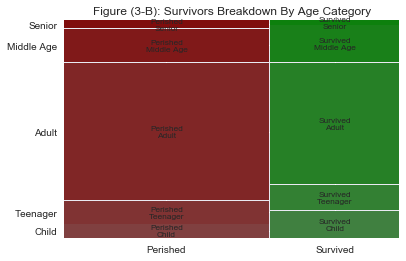

In [23]:
# Mosaic plot to give an idea about the percentages of the above Bar Chart 
mosaic(titanic_df.sort_values(['Status', 'AgeGroup']), ['Status', 'AgeGroup'], \
       title="Figure (3-B): Survivors Breakdown By Age Category")


In figure (3-B) above we can see that adults were a little more than 50% in Survived and around 60% in perished passengers. In total they represent the majority of the passengers. 


--------------------


We can also explore more by combining two factors while looking at 'Survived', for example we can consider the following plots: 



In the next three visualizations, we are going to plot:
- 'Survived' broken down by 
        'Sex' (male, female) 
            AND 
        'AgeGroup' (Child, Teenager, Adult, Middle Age, Senior)
            | Figure: (4)
- 'Survived' broken down by 
        'Pclass' (1, 2, 3) 
            AND 
        'Sex' (male, female)
            | Figure: (5)
- 'Survived' broken down by 
        'Pclass' (1, 2, 3) 
            AND 
        'AgeGroup' (Child, Teenager, Adult, Middle Age, Senior)
            | Figure: (6)


--------------------


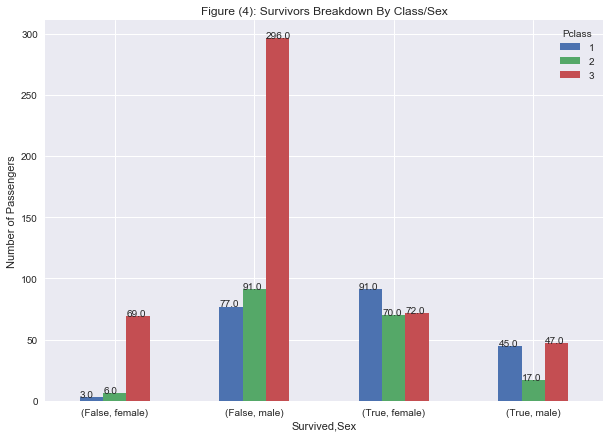

In [24]:
# Grouping the dataframe by 'Survived', 'Pclass', 'Sex' and then unstacking 'Pclass'
Survived_Class_Sex = titanic_df.groupby(['Survived', 'Pclass', 'Sex'])['Survived'].count().unstack('Pclass')

# Plotting 'Survived' broken down by 'Pclass', 'Sex'
ax = Survived_Class_Sex[[1, 2, 3]].plot(kind='bar', \
                                        title="Figure (4): Survivors Breakdown By Class/Sex", figsize=(10, 7), rot=0)
ax.set(ylabel="Number of Passengers")

# Showing values on top of the plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))


In figure (4) above, we're combining two factors: Class and Sex to see how such a socioeconomical factor is related to surviving. We can see that the majority of "males in the third class" had perished. While almost two thirds of females in first class had survived.  

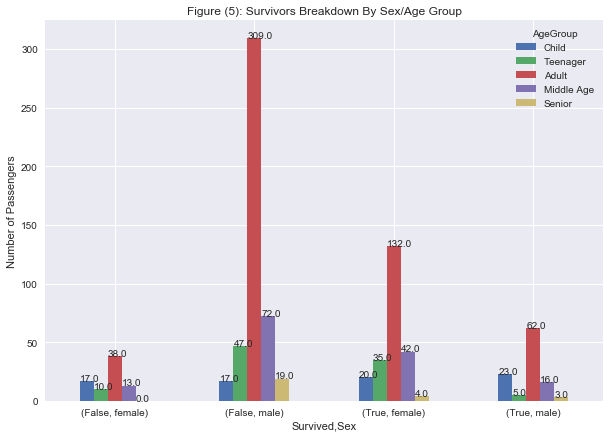

In [25]:
# Grouping the dataframe by 'Survived', 'AgeGroup', 'Sex' and then unstacking 'AgeGroup'
Survived_Sex_AgeGroup = titanic_df.groupby(['Survived','AgeGroup', 'Sex'])['Survived'].count().unstack('AgeGroup')

# Plotting 'Survived' broken down by 'Sex', 'AgeGroup'
ax = Survived_Sex_AgeGroup[['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']] \
    .plot(kind='bar', title="Figure (5): Survivors Breakdown By Sex/Age Group", figsize=(10, 7), rot=0)
ax.set(ylabel="Number of Passengers")

# Showing values on top of the plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))


In figure (5) above, we're combining two social factors: Age and Sex. We can see that the majority of adult males had perished. While the majority of adult females had survived.  

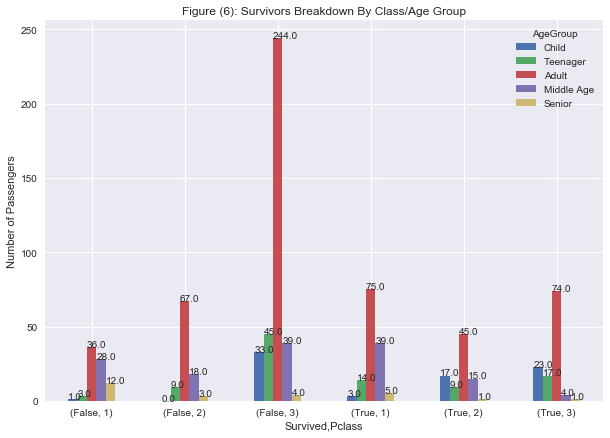

In [26]:
# Grouping the dataframe by 'Survived', 'AgeGroup', 'Pclass' and then unstacking 'AgeGroup'
Survived_Class_AgeGroup = titanic_df.groupby(['Survived', 'AgeGroup', 'Pclass'])['Survived']\
                            .count().unstack('AgeGroup')

# Plotting 'Survived' broken down by 'Pclass', 'AgeGroup'
ax = Survived_Class_AgeGroup[['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']] \
    .plot(kind='bar', title="Figure (6): Survivors Breakdown By Class/Age Group", figsize=(10, 7), rot=0)
ax.set(ylabel="Number of Passengers")

# Showing values on top of the plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))


In figure (6) above, we're combining two factors: Age and Class. Again we can see that the majority of adults in third class had perished. While almost two thirds of adults in the first class had survived.  


--------------------


We can also separate the dataframe into two and compare the characteristics of both dataframes based on Pclass', and 'Sex' to learn more about the Survivers and Non-Survivers



In the next two visualizations, we are going to plot:
- Survivers-Only broken down by 
        'Sex' (male, female) 
            AND 
        'Pclass' (1, 2, 3) 
            | Figure: (7)
- Non-Survivers-Only broken down by 
        'Sex' (male, female) 
            AND 
        'Pclass' (1, 2, 3) 
            | Figure: (8)


--------------------


In [27]:
# Separating the dataframe into two based on Survival Status
Survivers = pd.DataFrame(titanic_df[titanic_df.Survived == True])
Non_Survivers = pd.DataFrame(titanic_df[titanic_df.Survived == False])


(<matplotlib.figure.Figure at 0x11647ce90>,
 OrderedDict([(('1', 'female'), (0.0, 0.0, 0.39372358288460424, 0.66689466484268112)), (('1', 'male'), (0.0, 0.67021692397889376, 0.39372358288460424, 0.32978307602110613)), (('2', 'female'), (0.3986740779341092, 0.0, 0.25186729199235713, 0.80192461908580592)), (('2', 'male'), (0.3986740779341092, 0.80524687822201846, 0.25186729199235713, 0.1947531217779814)), (('3', 'female'), (0.6554918649759712, 0.0, 0.3445081350240287, 0.60303191043859394)), (('3', 'male'), (0.6554918649759712, 0.60635416957480659, 0.3445081350240287, 0.39364583042519335))]))

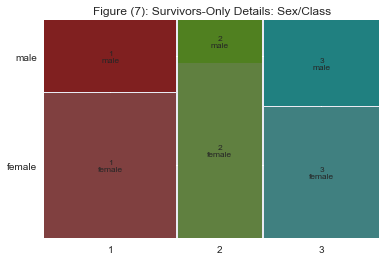

In [28]:
# Plotting a Mosaic plot for Survived Passengers only based on 'Pclass', and 'Sex'
mosaic(Survivers.sort_values(['Pclass', 'Sex']), ['Pclass', 'Sex'], \
       title="Figure (7): Survivors-Only Details: Sex/Class")

(<matplotlib.figure.Figure at 0x117127c90>,
 OrderedDict([(('1', 'female'), (0.0, 0.0, 0.14614007526213876, 0.037375415282392022)), (('1', 'male'), (0.0, 0.040697674418604647, 0.14614007526213876, 0.95930232558139528)), (('2', 'female'), (0.15109057031164372, 0.0, 0.17719484125534327, 0.061650169537966225)), (('2', 'male'), (0.15109057031164372, 0.06497242867417885, 0.17719484125534327, 0.93502757132582104)), (('3', 'female'), (0.33323590661649194, 0.0, 0.6667640933835081, 0.18841305238246939)), (('3', 'male'), (0.33323590661649194, 0.19173531151868201, 0.6667640933835081, 0.80826468848131794))]))

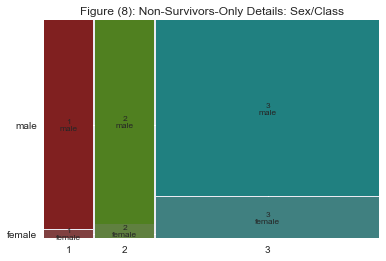

In [29]:
# Plotting a Mosaic plot for Non-Survived Passengers only based on 'Pclass', and 'Sex'
mosaic(Non_Survivers.sort_values(['Pclass', 'Sex']), ['Pclass', 'Sex'], \
       title="Figure (8): Non-Survivors-Only Details: Sex/Class")


--------------------

## Conclusions   

In the beginning of this project, we have asked three main questions: 

>**1. What are the social factors that affected the passengers' survival chances** <br />
This might include: 
               - Age
               - Sex
               - Number of Siblings/Spouses
               - Number of Parents/Children
               - Any other data point we can derive from the above

Well, to answer this question:
- From figures (1-A) and (1-B), we can see that the majority of survivers were females (with a percentage of around 70%) and the majority of non-survivers were males (almost 90%)
- From figures (3-A) and (3-B), we can see that the majority of the passengers wer adults in the first place, and most of them did not survive. For seniors, it's worse as there is 2x chance to not survive.    

>**2. What are the economical factors that affected the passengers' survival chances** <br />
This might include: 
               - Ticket Class
               - Fare
               - Cabin 
               - Port of Embarkation 
- From figures (2-A) and (2-B), we can see that there are survivers from all 3 classes 

Well, to answer this question:
- From figures (2-A) and (2-B), we can see that there are survivers from all 3 classes with a slightly higher chance to survive for the first class passengers. However, the majority of non-survivers (almost 70%) are passengers in the third class. 
- Other factors such as Fare, Cabin, and Port of Embarkation were not considered in this analysis as they were in a way reflected in all other considered factors. 


>**3. What combinations of social and economical factors can tell us more about survival chances?** <br />
It would be interesting to see how multiple combined socio-economic factors affected the chances of survival. 

This is were the interesting insights start to show up. By looking at the rest of the charts we can see the following:
- From figure (4), we can see that the highest rate of not surviving goes to males in the third class, followed by males in second then third class. While for females, being in third class shows almost equal chances of surviving vs not surviving. However, for females in first and seocnd classes, they are most likely to survive. 
- From figure (5), we can see that being a male adult decreases chance to suvive dramatically, and on the opposit, being a female adult, middle aged, or teenager increase the chances to survive. We can also notice that being a child (male or female) slightly increases chances of survival.
- From figure (6), we can see that being an adult in third class decreases the chances of surviving compared to being an adult in first class who have a higher chance to survive. 
- In figures (7) and (8), we can compare between two separate groups of the dataset: Survivers-only and Non-Survivers-only based on grouping by Sex and Class. This helps us confirm the overwhelming majority of male non-survivers with around 60% of them were at the third class and the high survival rate of females in general regardless of the class. 


In general, this give us a clear picutre of the dificulty faced by third class passengers to get out in time, hence the high non-survival rate. Yet, it seems that the culture was more towards helping women and children passengers to get to safety even if that meant sacrificing men's lives. This culture was noticed in the second and third classes as well. In memory of those men, we can say that they were truly gentlemen.  

--------------------


## Limitations   

- Missing Values:   
Around 20% of Age observations, 77% of Cabin observations and 0.22% of Embarked observations were missing. In my analysis, I was particularly interested in the Age field, so I had to replace the missing values. I've created groups for passengers based on their "Title" as an indicator of the Age, and then replaced the missing values with the average of the group the passenger belongs to taking into consideration the number of siblings/spouses, and Parents/children. 


- Number of Attributes/Columns:   
The number of filed (columns) was not enough to easily categorize passengers, so I had to derive a new column "Title" from the name column. 


-----------------------





## Resources:

- [1]: [RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic)
- [2]: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)
- [3]: [Introduction to Data Science with R - Data Analysis Part 2](https://www.youtube.com/watch?v=u6sahb7Hmog) 
- [4]: [Categorical Data (pandas 0.19.2 documentation)](http://pandas.pydata.org/pandas-docs/stable/categorical.html) 
- [5]: [Pandas Pivot Tables Explained](http://pbpython.com/pandas-pivot-table-explained.html)
- [6]: [Group By: split-apply-combine (pandas 0.19.2 documentation)](http://pandas.pydata.org/pandas-docs/stable/groupby.html) 
- [7]: [Pivot Tables or Group By for Pandas?](http://stackoverflow.com/questions/30679467/pivot-tables-or-group-by-for-pandas)
- [8]: [Markdown Syntax Guide](https://sourceforge.net/p/subtext/wiki/markdown_syntax/)
- [9]: [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) 